# OpenClip

[OpenClip](https://github.com/mlfoundations/open_clip/tree/main) is an source implementation of OpenAI's CLIP.

These multi-modal embeddings can be used to embed images or text.

For text, use the same method `embed_documents` as with other embedding models.

For images, use `embed_image` and simply pass a numpy array.

In [ ]:
! pip install pillow open_clip_torch torch

In [4]:
import numpy as np
import seaborn as sns
from PIL import Image as _PILImage
from langchain.embeddings import OpenCLIPEmbeddings

# Images
img_path_dog = "/Users/rlm/Desktop/Papers/LLaVA/dog.jpeg"
img_path_house = "/Users/rlm/Desktop/Papers/LLaVA/house.jpeg"

# Load images and convert to numpy arrays
image_np_dog = np.array(_PILImage.open(img_path_dog).convert("RGB"))
image_np_house = np.array(_PILImage.open(img_path_house).convert("RGB"))

# Embe images or text
clip_embd = OpenCLIPEmbeddings()
img_feat_dog = clip_embd.embed_image([image_np_dog])
img_feat_house = clip_embd.embed_image([image_np_house])
text_feat_dog = clip_embd.embed_documents(["dog"])
text_feat_house = clip_embd.embed_documents(["house"])

## Sanity check

We can check simiarlity. 

(2, 2)


<Axes: >

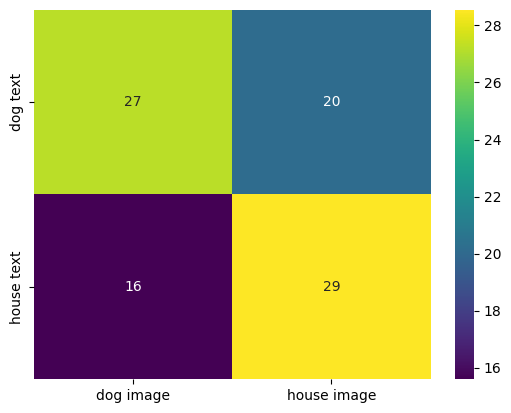

In [7]:
# Convert to numpy arrays
img_feat_dog_np = np.array(img_feat_dog[0])
img_feat_house_np = np.array(img_feat_house[0])
text_feat_dog_np = np.array(text_feat_dog[0])
text_feat_house_np = np.array(text_feat_house[0])

# Compute similarity
similarities = np.array(
    [
        [text_feat_dog_np @ img_feat_dog_np.T][0][0],
        [text_feat_dog_np @ img_feat_house_np.T][0][0],
        [text_feat_house_np @ img_feat_dog_np.T][0][0],
        [text_feat_house_np @ img_feat_house_np.T][0][0],
    ]
).reshape(2, 2)

# Ensure similarities is of shape (2, 2)
print(similarities.shape)  # Expected: (2, 2)

# Plot heatmap
sns.heatmap(
    similarities,
    annot=True,
    cmap="viridis",
    xticklabels=["dog image", "house image"],
    yticklabels=["dog text", "house text"],
)